# CART Regression Feature Importance

## Imports

In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Functions

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

## Open File

In [3]:
datasetname_out = 'USA_houseprices_2014'

In [4]:
df = pd.read_csv("../datasets/USA_houseprices_2014/USA-HOUSEPRICES-2014-NORMALIZED.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement,price
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,0.336428,0.837209,0.815789,0.0,0.921053,False,313000.0
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,0.861848,0.813953,0.763158,0.0,0.184211,True,2384000.0
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,0.506410,0.418605,0.342105,0.0,0.578947,False,342000.0
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,0.942308,0.069767,0.092105,0.0,0.552632,True,420000.0
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,0.961981,0.720930,0.407895,0.0,0.807018,True,550000.0


In [5]:
X = df.copy()
y = X.pop("price")
colnames = X.columns

## CART

In [6]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Feature: 0, Score: 0.00355
Feature: 1, Score: 0.01375
Feature: 2, Score: 0.22847
Feature: 3, Score: 0.06409
Feature: 4, Score: 0.00361
Feature: 5, Score: 0.01666
Feature: 6, Score: 0.01130
Feature: 7, Score: 0.00228
Feature: 8, Score: 0.01366
Feature: 9, Score: 0.00448
Feature: 10, Score: 0.02107
Feature: 11, Score: 0.00459
Feature: 12, Score: 0.48330
Feature: 13, Score: 0.02249
Feature: 14, Score: 0.04519
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.06090
Feature: 17, Score: 0.00062


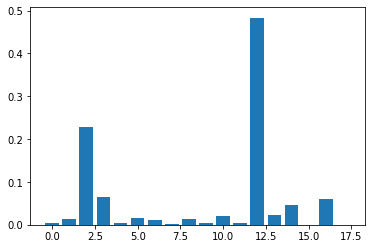

In [7]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
cart = DecisionTreeRegressor()
cart.fit(X,y)
ranks["CART"] = ranking(cart.feature_importances_, colnames);

In [9]:
ranks

{'CART': {'bedrooms': 0.01,
  'bathrooms': 0.03,
  'sqft_living': 0.47,
  'sqft_lot': 0.13,
  'floors': 0.01,
  'waterfront': 0.03,
  'view': 0.02,
  'condition': 0.01,
  'sqft_above': 0.03,
  'sqft_basement': 0.01,
  'yr_built': 0.04,
  'yr_renovated': 0.12,
  'street': 1.0,
  'city': 0.04,
  'statezip': 0.1,
  'country': 0.0,
  'last_modification': 0.02,
  'have_basement': 0.0}}

## Linear, ridge and Lasso

In [10]:
lr = LinearRegression()
lr.fit(X,y)
ranks["Linear_regression"] = ranking(np.abs(lr.coef_), colnames)
#print ("Linear model:", pretty_print_linear(lr.coef_))

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge_regression'] = ranking(np.abs(ridge.coef_), colnames)
#print ("Ridge model:", pretty_print_linear(ridge.coef_))

# Using Lasso
lasso = Lasso(alpha=.005)
lasso.fit(X,y)
ranks["Lasso_regression"] = ranking(np.abs(lasso.coef_), colnames)
#print ("Lasso model:", pretty_print_linear(lasso.coef_))

methods_names = [ key for key in ranks.keys()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.934e+13, tolerance: 1.462e+11
  model = cd_fast.enet_coordinate_descent(


## Random Forest

In [11]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X, y)
ranks["RF_simple"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s



building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


## Combine the ranks

In [12]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index
rank_df

,CART,Linear_regression,Ridge_regression,Lasso_regression,RF_simple,feature_name
bedrooms,14.5,5.0,8.0,3.0,14.5,bedrooms
bathrooms,9.0,6.0,3.0,4.0,12.5,bathrooms
sqft_living,2.0,2.0,2.0,1.0,2.0,sqft_living
sqft_lot,3.0,3.0,9.0,2.0,4.0,sqft_lot
floors,14.5,13.0,12.5,12.5,10.5,floors
waterfront,9.0,7.0,5.0,5.0,16.0,waterfront
view,11.5,9.0,7.0,8.0,10.5,view
condition,14.5,10.0,10.5,9.5,14.5,condition
sqft_above,9.0,1.0,1.0,14.5,6.0,sqft_above
sqft_basement,14.5,4.0,4.0,7.0,9.0,sqft_basement


## Write to file

In [13]:
# Save results
rank_df.to_csv('../data/featureranks_CART.csv', sep=';',index=False)